# Visualizing SVD

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

In [ ]:
fig, ax = plt.subplots()

basis = np.array([[1,0],[0,1]])
dotA = np.dot(basis, A)
angle = np.angle(dotA, deg=True)
print(dotA)

arrs = [A[0],A[1], dotA]
colors = ["red","green","blue"]

# for idx,vec in enumerate(arrs):
#     print(vec)
ax.annotate('', xy=(dotA[0][0],dotA[0][1]), xytext=(0, 0),arrowprops=dict(facecolor=colors[0], shrink=0))
ax.annotate('', xy=(dotA[1][0],dotA[1][1]), xytext=(0, 0),arrowprops=dict(facecolor=colors[0], shrink=0))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect("equal")

plt.show()

In [ ]:
fig, ax = plt.subplots(1,6,figsize=(10,10))

Sdiag = np.diag(S)
VtSdiag = np.dot(Sdiag, VT)
res = np.dot(U, VtSdiag)

arrs = [A, VT, Sdiag, VtSdiag, U, res]
labels = ["A", "VT", "S", "S dot VT", "U", "U dot S dot VT"]

for idx,arr in enumerate(arrs):
    ax[idx].annotate('', xy=(arr[0][0],arr[0][1]), xytext=(0, 0),arrowprops=dict(facecolor='red', shrink=0))
    ax[idx].annotate('', xy=(arr[1][0],arr[1][1]), xytext=(0, 0),arrowprops=dict(facecolor='blue', shrink=0))
    ax[idx].set_title(labels[idx])
    ax[idx].set_xlim(-10, 10)
    ax[idx].set_ylim(-10, 10)
    ax[idx].set_aspect("equal")

# # draw Vt
# ax[1].annotate('', xy=(VT[0][0],VT[0][1]), xytext=(0, 0),arrowprops=dict(facecolor='green', shrink=0))
# ax[1].set_title("VT")


# draw Sigma.Vt

# ax[2].annotate('', xy=(VtSdiag[0][0],VtSdiag[0][1]), xytext=(0, 0),arrowprops=dict(facecolor='green', shrink=0))
# ax[2].set_title("Sdiag . VT")

# draw U dot Sigma dot Vt

# ax[3].annotate('', xy=(res[0][0],res[0][1]), xytext=(0, 0),arrowprops=dict(facecolor='green', shrink=0))
# ax[3].set_title("Sdiag . VT")

plt.show()

## Scratch Code

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots()

# Draw a circle
# circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ellipse = Ellipse((0, 0), width=8*2, height=9*2,angle=0)
ax.add_artist(ellipse)

# Draw an arrow starting from the center of the circle
plt.annotate('', xy=(A[0][0],A[0][1]), xytext=(0, 0),arrowprops=dict(facecolor='green', shrink=0))
plt.annotate('', xy=(A[1][0],A[1][1]), xytext=(0, 0),arrowprops=dict(facecolor='red', shrink=0))


# Set limits to ensure the full circle and arrow are visible
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')

# Add grid and title
plt.grid(True)
plt.title('Circle with Arrow')

# Show the plot
plt.show()


In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Define the ellipse parameters (center, width, height, and rotation angle)
ellipse = Ellipse(xy=(0, 0), width=4, height=2, angle=45, edgecolor='blue', fc='None', lw=2)

# Add the ellipse to the plot
ax.add_patch(ellipse)

# Define vectors to visualize (e.g., left singular vectors from SVD)
vectors = np.array([[1, 1], [-1, 0.5], [0.5, -1]])  # Example vectors

# Plot the vectors using quiver (from origin)
for vector in vectors:
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='green')

# Adjust plot limits and aspect ratio to make sure ellipse and vectors fit
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')

# Add grid and labels
plt.title('Ellipse with Vectors')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


In [81]:
import math

# matrix multiplication dah ada
def matrix_multiplication(a,b):
    if len(a[0]) != len(b):
        return ValueError("matrix must be MxN x NxP")
    
    resMatrix = []
    for i in range(len(a)):
        tmp = []
        for j in range(len(b[0])):
            res = 0
            for k in range(len(b)):
                res += a[i][k] * b[k][j]
            
            tmp.append(res)
        resMatrix.append(tmp)

    return resMatrix

# find matrix transpose
def transpose_matrix(matrix):
    if not hasattr(matrix[0], '__len__'):
        return TypeError("must be a MxN matrix!")

    newmatrix = []
    for i in range(len(matrix[0])):
        tmp = []
        for j in range(len(matrix)):
            tmp.append(matrix[j][i])

        newmatrix.append(tmp)

    return newmatrix

# generate matrix identity

# compute eigenvalues
def compute_eigenvalues_2x2(A):
    # A is a 2x2 matrix [[a, b], [c, d]]
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]
    
    # Characteristic equation: λ^2 - (a + d)λ + (ad - bc) = 0
    trace = a + d  # This is (a + d)
    determinant = a * d - b * c  # This is (ad - bc)
    
    # Solving the quadratic equation: λ = [-trace ± sqrt(trace^2 - 4*determinant)] / 2
    discriminant = trace**2 - 4 * determinant
    eigenvalue1 = (trace + math.sqrt(discriminant)) / 2
    eigenvalue2 = (trace - math.sqrt(discriminant)) / 2
    
    return eigenvalue1, eigenvalue2

# compute eigenvector
def compute_eigenvector_2x2(A, eigenvalue):
    # A is a 2x2 matrix [[a, b], [c, d]]
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]

    # Calculate eigenvectors manually
    # For the first eigenvalue (lambda_1):
    if b != 0:
        eigenvector = np.array([eigenvalue - d, b])
    else:
        eigenvector = np.array([c, eigenvalue - a])
    eigenvector = eigenvector / np.linalg.norm(eigenvector)  # Normalize the vector
    
    eigenvector = eigenvector / np.linalg.norm(eigenvector)  # Normalize the vector
    return eigenvector.tolist()

def svd_2x2(A):
    # find A Transpose
    A_transpose = transpose_matrix(A)
    
    # calculate AT A
    A_transpose_A = matrix_multiplication(A_transpose,A)

    # calculate A AT
    A_A_transpose = matrix_multiplication(A, A_transpose)

    # find eigenvalues of AT A
    eigAtA1, eigAtA2 = compute_eigenvalues_2x2(A_transpose_A)
    
    # find eigenvalues of A AT
    eigAAt1, eigAAt2 = compute_eigenvalues_2x2(A_A_transpose)

    # find eigenvectors of AT A
    eigVecAtA1 = compute_eigenvector_2x2(A_transpose_A, eigAtA1)
    eigVecAtA2 = compute_eigenvector_2x2(A_transpose_A, eigAtA2)


    # find eigenvectors of A AT
    eigVecAAt1 = compute_eigenvector_2x2(A_A_transpose, eigAAt1)
    eigVecAAt2 = compute_eigenvector_2x2(A_A_transpose, eigAAt2)
    
    # find U
    U = transpose_matrix([eigVecAAt1, eigVecAAt2])

    # find V Transpose
    V  = [eigVecAtA1, eigVecAtA2]

    # singular values Sigma
    sigma = []
    
    if eigAtA1 > eigAtA2 :
        sigma = [math.sqrt(eigAtA1), math.sqrt(eigAtA2)]
    else :
        sigma = [math.sqrt(eigAtA2), math.sqrt(eigAtA1)]

    return U, sigma, V

def draw_vector(ax, vector, color='black', label=None):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color)
    if label:
        ax.text(vector[0], vector[1], label, fontsize=12, color=color)

def plot_svd_visualization(circle_points, transformed_points, sigma_transformed, U_matrix, V_transposed, singular_values):
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # 4 plots side by side
 
    # Step 1: Plot the original circle and vectors v1, v2 (before transformation)
    axs[0].plot(circle_points[0, :], circle_points[1, :], label='apaansih', color='blue')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[0], V_transposed[:, 0], color='red', label='$v_1$')
    draw_vector(axs[0], V_transposed[:, 1], color='green', label='$v_2$')
    axs[0].set_title("Original Circle and Vectors")
    axs[0].set_aspect('equal')
 
    # Step 2: After applying V^T (rotate the circle)
    axs[1].plot(transformed_points[0, :], transformed_points[1, :], label='Transformed (V^T x)', color='blue')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[1], [1, 0], color='red', label='x-axis')  # Transformed X-axis
    draw_vector(axs[1], [0, 1], color='green', label='y-axis')  # Transformed Y-axis
    axs[1].set_title("After V^T (Rotation)")
    axs[1].set_aspect('equal')
 
    # Step 3: After applying Σ (scale the circle)
    axs[2].plot(sigma_transformed[0, :], sigma_transformed[1, :], label=r'wow Transformed (\sigma * V^{T} x)', color='blue')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[2], [singular_values[0], 0], color='red', label='$σ_1$')
    draw_vector(axs[2], [0, singular_values[1]], color='green', label='$σ_2$')
    axs[2].set_title("After Σ (Scaling)")
    axs[2].set_aspect('equal')
 
    # Step 4: After applying U (final transformation)
    U_transformed = U_matrix @ sigma_transformed
    axs[3].plot(U_transformed[0, :], U_transformed[1, :], label='Transformed (U * Σ * V^T x)', color='blue')
    axs[3].axhline(0, color='black', linewidth=0.5)
    axs[3].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[3], U_matrix[:, 0] * singular_values[0], color='red', label='$σ_1 u_1$')
    draw_vector(axs[3], U_matrix[:, 1] * singular_values[1], color='green', label='$σ_2 u_2$')
    axs[3].set_title("After U (Final Transformation)")
    axs[3].set_aspect('equal')
 
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
 



In [69]:
A = [[6,3],
     [3,6]]

U, Sigma, VT = svd_2x2(A)

print(U)
print(Sigma)
print(VT)

[[0.7071067811865476, -0.7071067811865476], [0.7071067811865476, 0.7071067811865476]]
[9.0, 3.0]
[[0.7071067811865476, 0.7071067811865476], [-0.7071067811865476, 0.7071067811865476]]


In [68]:
A = np.array([[6, 3],
              [3, 6]])

U, S, VT = np.linalg.svd(A)

print(U)
print(S)
print(VT)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[9. 3.]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[9. 3.]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


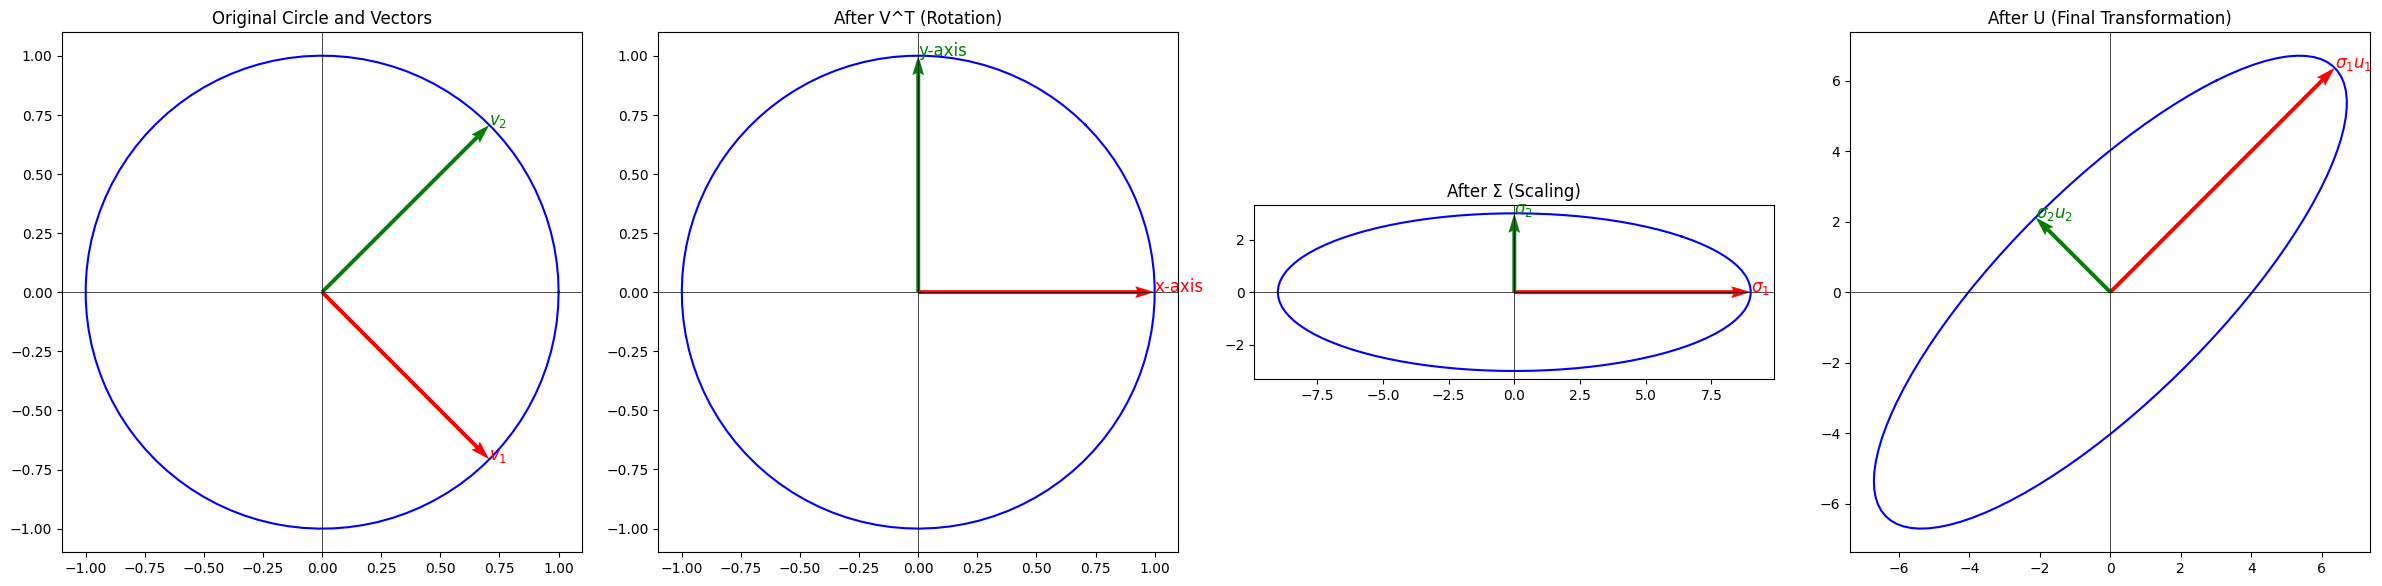

In [83]:
# Define the matrix A
A = np.array([[6, 3],
              [3, 6]])

# Perform Singular Value Decomposition
U, Sigma, VT = svd_2x2(A)

U = np.array(U)
Sigma = np.array(Sigma)
VT = np.array(VT)

print(U)
print(Sigma)
print(VT)

# Create a unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])  # Parametric equation for a unit circle

# Apply transformations in steps
circle_rotated_by_VT = VT.T @ circle               # Rotate the unit circle by V^T
ellipse_scaled = np.diag(Sigma) @ circle_rotated_by_VT  # Scale by Sigma
final_transformation = U @ ellipse_scaled           # Apply U to the scaled ellipse

plot_svd_visualization(
    circle,
    circle_rotated_by_VT,
    ellipse_scaled,
    U,
    VT,
    Sigma
)